<a href="https://colab.research.google.com/github/Otavio-Mendonca/MachineLearning_DecisionTree/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd #biblioteca para manipulação de dados (data manipulation with DataFrames)
from sklearn.datasets import load_iris # scitik-learn é um pacote p/ machine learning

data_o = load_iris() 
dataset = pd.DataFrame(data=data_o['data'], columns=data_o['feature_names']) # objectives instance
dataset


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [2]:
from sklearn.model_selection import train_test_split
X = dataset.copy() # entrada
y = data_o['target'] # saida
# Our goal is to split the data into 2 different sets (train and test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)


In [3]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', ccp_alpha=.05) # we can place parameters (stop, criterion, ...) here
clf = clf.fit(X_train, y_train) # fazer ajuste

In [4]:
clf.get_params()

{'ccp_alpha': 0.05,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [5]:
predictions = clf.predict(X_test)
predictions - y_test


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0])

In [6]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, predictions)

0.92

In [7]:
feature_names = X.columns
feature_names # the attributes

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [8]:
feature_importance = pd.DataFrame(clf.feature_importances_, index=feature_names).sort_values(0, ascending=False)
feature_importance 

,0
petal width (cm),0.664165
petal length (cm),0.335835
sepal length (cm),0.000000
sepal width (cm),0.000000


In [9]:
features = list(feature_importance[feature_importance[0]>0].index)
features

['petal width (cm)', 'petal length (cm)']

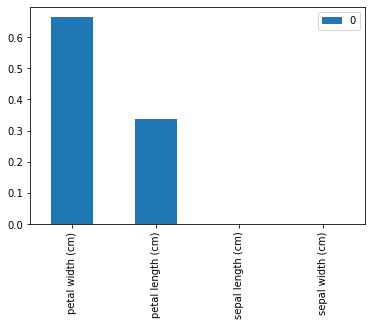

In [10]:
feature_importance.head(4).plot(kind="bar")

In [11]:
from sklearn import tree
import matplotlib.pyplot as plt


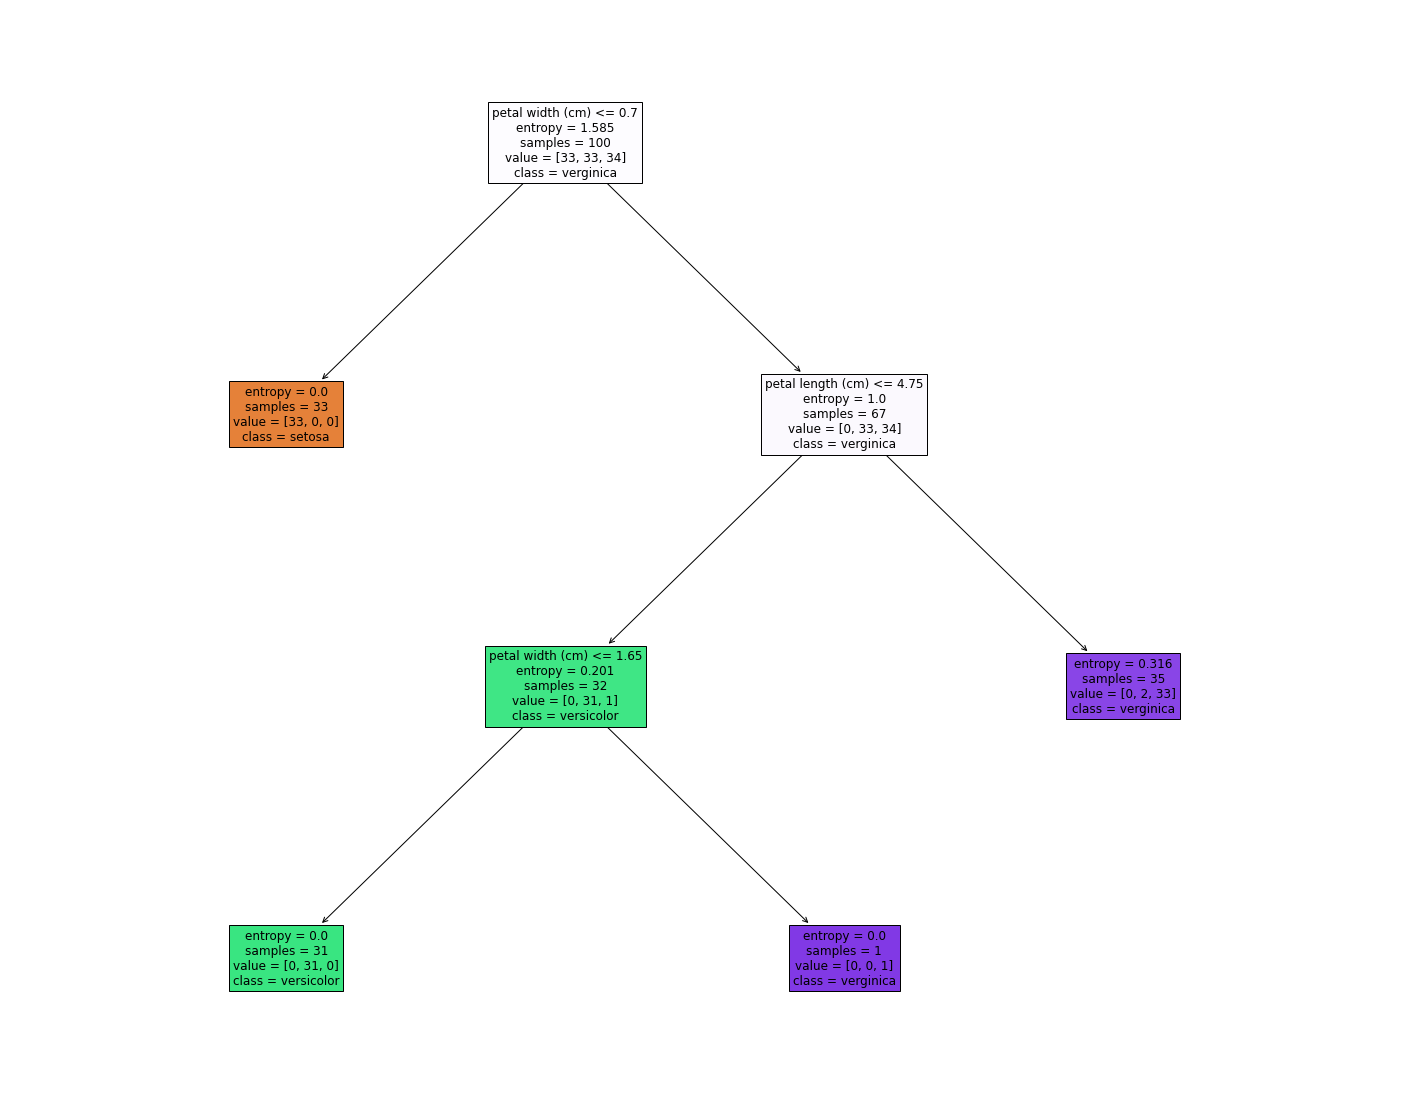

In [14]:
fig = plt.figure(figsize=(25, 20))
fig = tree.plot_tree(clf, feature_names=feature_names, class_names={0:'setosa', 1:'versicolor', 2:'verginica'}, filled=True, fontsize=12)
